# Weather Data Automation Report

This notebook documents the process of automating weather data collection and timestamp management using shell commands and scripts. The tasks include creating directory structures, appending timestamps, formatting files, downloading weather data, and writing a reusable script.

## Task 1: Create Directory Structure

To organize the files, I created a directory structure with a root folder named `data` and two subdirectories: `timestamps` (for timestamp-related files) and `weather` (for weather data files).

### Commands Used:
- `mkdir -p data/timestamps data/weather`: This command creates the directories in one step. The `-p` flag ensures that parent directories are created if they do not exist.

## Task 2: Timestamps

I navigated to the `data/timestamps` directory and appended the current date and time to a file named `now.txt`. This was repeated ten times.

### Commands Used:
- `cd data/timestamps`: Changes the current directory to `data/timestamps`.
- `date >> now.txt`: Appends the current date and time to `now.txt`.
- `more now.txt`: Displays the content of `now.txt` to verify it.

## Task 3: Formatting Timestamps

I formatted timestamps in the `YYYYmmdd_HHMMSS` format and appended them to a file named `formatted.txt`.

### Commands Used:
- `date +%Y%m%d_%H%M%S >> formatted.txt`: Formats the timestamp and appends it to `formatted.txt`.

## Task 4: Create Timestamped Files

I used the `touch` command with an embedded date command to create empty files named in the format `YYYYmmdd_HHMMSS.txt`.

### Commands Used:
- `touch $(date +%Y%m%d_%H%M%S).txt`: Creates an empty file with a timestamped name.

## Task 5: Download Today's Weather Data

I downloaded weather data for Athenry using the `wget` command and saved it as `weather.json`.

### Commands Used:
- `wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today`: Downloads the data and saves it as `weather.json`.

## Task 6: Timestamp the Data

I modified the previous command to save weather data with a timestamped filename.

### Commands Used:
- `wget -O $(date +%Y%m%d_%H%M%S).json https://prodapi.metweb.ie/observations/athenry/today`: Saves weather data with a timestamped filename.

## Task 7: Write the Script

I wrote a script named `weather.sh` to automate weather data downloads, manage old files, and update timestamps. The script performs the following tasks:
1. Downloads weather data with a timestamped filename.
2. Keeps only the last ten JSON files in the directory.
3. Updates the timestamps file (`now.txt`) with only the last ten entries.

### Script Content:
```bash
#! /bin/bash

echo "Downloading weather data"

curl -o data/weather/`date +"%Y%m%d_%H%M%S_athenry.json"` https://prodapi.metweb.ie/observations/athenry/today

echo "Download complete"

# Keep only the last 10 JSON files in the directory

echo "Cleaning up old JSON files"

ls -tp data/weather/*.json | grep -v '/$' | tail -n +11 | xargs -d '\n' rm -- 2>/dev/null

echo "Old JSON files removed"

echo "Updating timestamps file"

date +%Y%m%d_%H%M%S_%Z >> data/timestamps/now.txt

# Keep only the last 10 lines in now.txt

tail -n 10 data/timestamps/now.txt > data/timestamps/temp.txt

mv data/timestamps/temp.txt data/timestamps/now.txt

echo "Timestamps updated"

echo "Reading last 10 timestamps"

more data/timestamps/now.txt

echo "Script finished"


#### **Cell 9: Conclusion**

This project demonstrates how to automate tasks such as directory creation, timestamp management, and downloading weather data using shell commands and scripts. The automation ensures efficient file management and reduces manual effort.

## Import Libraries


In [17]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## Load Weather Data

Use the pandas.read_json() function to load one of the weather data files. Replace <filename> with the actual name of one of your JSON files (e.g., 20241206_220000_athenry.json):

In [18]:
# Load the JSON file into a pandas DataFrame
file_directory = "..\\computer-infrastructure\\data\\weather\\"
file_name = "20241202_102658_athenry.json" # Replace <filename> with an actual file name
weather_data = pd.read_json(file_directory + file_name)

# Display the first few rows of the data
weather_data.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,7,02n,Fair,"""Fair""",17,-,NW,315,88,0.00,1013,Monday,2024-02-12,00:00
1,Athenry,7,04n,Cloudy,"""Cloudy""",15,-,W,270,85,0.00,1014,Monday,2024-02-12,01:00
2,Athenry,7,02n,Fair,"""Fair""",17,-,NW,315,86,0.00,1015,Monday,2024-02-12,02:00
3,Athenry,6,46n,Light rain,"""Moderate Drizzle """,26,-,NW,315,86,0.01,1016,Monday,2024-02-12,03:00
4,Athenry,5,46n,Light rain,"""Recent Drizzle """,15,-,NW,315,89,0.01,1017,Monday,2024-02-12,04:00


##Examine and Summarize the Data

Use pandas functions to examine and summarize the dataset:

In [19]:
# Display basic information about the dataset
weather_data.info()

# Display summary statistics for numerical columns
weather_data.describe()

# Display column names to understand the structure
print(weather_data.columns)

# Display a sample of the data to understand its content
print(weather_data.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   11 non-null     object        
 1   temperature            11 non-null     int64         
 2   symbol                 11 non-null     object        
 3   weatherDescription     11 non-null     object        
 4   text                   11 non-null     object        
 5   windSpeed              11 non-null     int64         
 6   windGust               11 non-null     object        
 7   cardinalWindDirection  11 non-null     object        
 8   windDirection          11 non-null     int64         
 9   humidity               11 non-null     int64         
 10  rainfall               11 non-null     float64       
 11  pressure               11 non-null     int64         
 12  dayName                11 non-null     object        
 13  date   

## Weather Dataset Explanation

The weather data file contains observations from Met Éireann's Athenry weather station. The dataset includes real-time weather information such as temperature, humidity, wind speed, and other meteorological parameters. 

### Key Fields in the Dataset:
- **Temperature**: The current temperature in degrees Celsius.
- **Humidity**: The percentage of moisture in the air.
- **Wind Speed**: The speed of wind measured in meters per second or kilometers per hour.
- **Wind Direction**: The direction from which the wind is blowing, typically given in degrees.
- **Pressure**: Atmospheric pressure measured in hPa (hectopascals).
- **Rainfall**: The amount of precipitation recorded, usually measured in millimeters.

This data provides valuable insights into current weather conditions and can be used for analysis, forecasting, or research purposes.

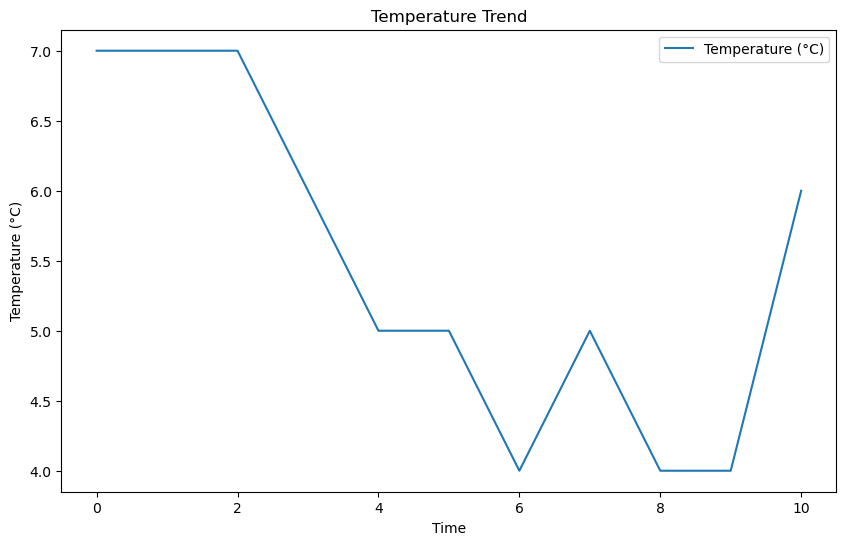

In [20]:
# Plot temperature over time (if there's a time-related field)
if 'temperature' in weather_data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(weather_data['temperature'], label='Temperature (°C)')
    plt.title('Temperature Trend')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.show()